In [1]:
from IPython.display import display, HTML
import numpy as np
import glob
from spaceKLIP import database

def setup_display(width=95, fontsize=16):
    """
    Sets window width and markdown fontsize for Jupyter notebook. Width is % of window.
    """
    display(HTML("<style>.container { width:"+str(width)+"% !important; }</style>"))
    display(HTML("<style>.rendered_html { font-size: "+str(fontsize)+"px; }</style>"))
    return None

def source(fn):
    import inspect
    print(inspect.getsource(fn))
    return None

setup_display()

%matplotlib notebook

In [2]:
base_dir = '/Users/kdlawso1/jwst/GO4050/out/'
input_dir = f'{base_dir}bpcleaned/' # or nanreplaced, etc., if using this to clean up a few residual bad pixels.
output_dir = input_dir
data_ext = 'calints'
fitsfiles = np.sort(glob.glob(f'{input_dir}*{data_ext}.fits')) # Populate a file list

# Initialize the spaceKLIP database and read the input FITS files.
Database = database.Database(output_dir=output_dir)
Database.verbose = False
Database.read_jwst_s012_data(datapaths=fitsfiles,
                             psflibpaths=None,
                             bgpaths=None)

concats = list(Database.obs.keys())
concats

['JWST_NIRCAM_NRCA2_F200W_MASKRND_MASK335R_SUB320A335R',
 'JWST_NIRCAM_NRCALONG_F444W_MASKRND_MASK335R_SUB320A335R']

### Notes:

Left panel shows the full frame plus a little padding to make bad edge pixels visible. 

Right panel shows a zoom of the region inside the dashed box in the left panel.

**Clicking the left panel changes the location of the zoomed panel. The size of the box is governed by the "zwin" argument.**

**Clicking the right panel toggles the bad pixel flag for the clicked pixel. Currently flagged pixels are colored according to the "flag_color" argument (red by default).**


### Bottom center navigation bars:

**Int** (hidden if 'median' option is checked (default)): change the integration being displayed and flagged

**Exp**: change the exposure being displayed and flagged; on change, will load the previously saved bad pixel map for the new exposure if one exists.

### Right side widgets:

**vmin / vmax**: the min and max color stretch for the data. If they contain a '%' symbol, they are used as a percentile bound of the current image cube — e.g., vmax='99.9%' will yield a color stretch maximum value of np.nanpercentile(imcube, 99.9). Can also include a '\*' symbol, in which case the terms on either side will be multiplied — e.g., vmin = -1\*99.99%, vmax=99.99% will produce an image with a stretch symmetric about zero. Default vmin,vmax set by the clim_init argument.

**save**: save the current exposure's bad pixel map to the indicated badpx_subdir with filename set to the input filename with "badpixel_map" appended.

**copy**: copy the currently displayed bad pixel map to paste elsewhere

**paste**: overwrite the current image's bad pixel map with a previously copied bad pixel map.

**clear exp**: clear the bad pixel map for the entire current exposure (i.e., unflag all flagged pixels)

**clear int**: clear the bad pixel map for the current integration only; if median and/or change_all_ints boxes are checked, has same behavior as clear exp

**change all ints**: if checked, any flagging/unflagging pixels (including with paste or clear int) will update the corresponding pixel(s) in all integrations of the current exposure

**median**: if checked, hides the "int" navigation bar, enforces "change all ints" behavior, and switches the displayed image to the median of the current exposure's integrations

**autosave**: if checked, changing exposures will automatically save the current bad pixel map


### General procedure:

- clean your monitor  

- flag all clear outliers in the median image  

- optionally, uncheck "median" in the lower right and click through each integration to check for bad pixels in individual integrations  

- proceed to the next exposure  

- repeat for each concatenation  

## Warning: with 'autosave' checked, to save the final exposure you will still need to either manually click "save" or switch back to a previous exposure — since autosave only saves the exposures on

<IPython.core.display.Javascript object>


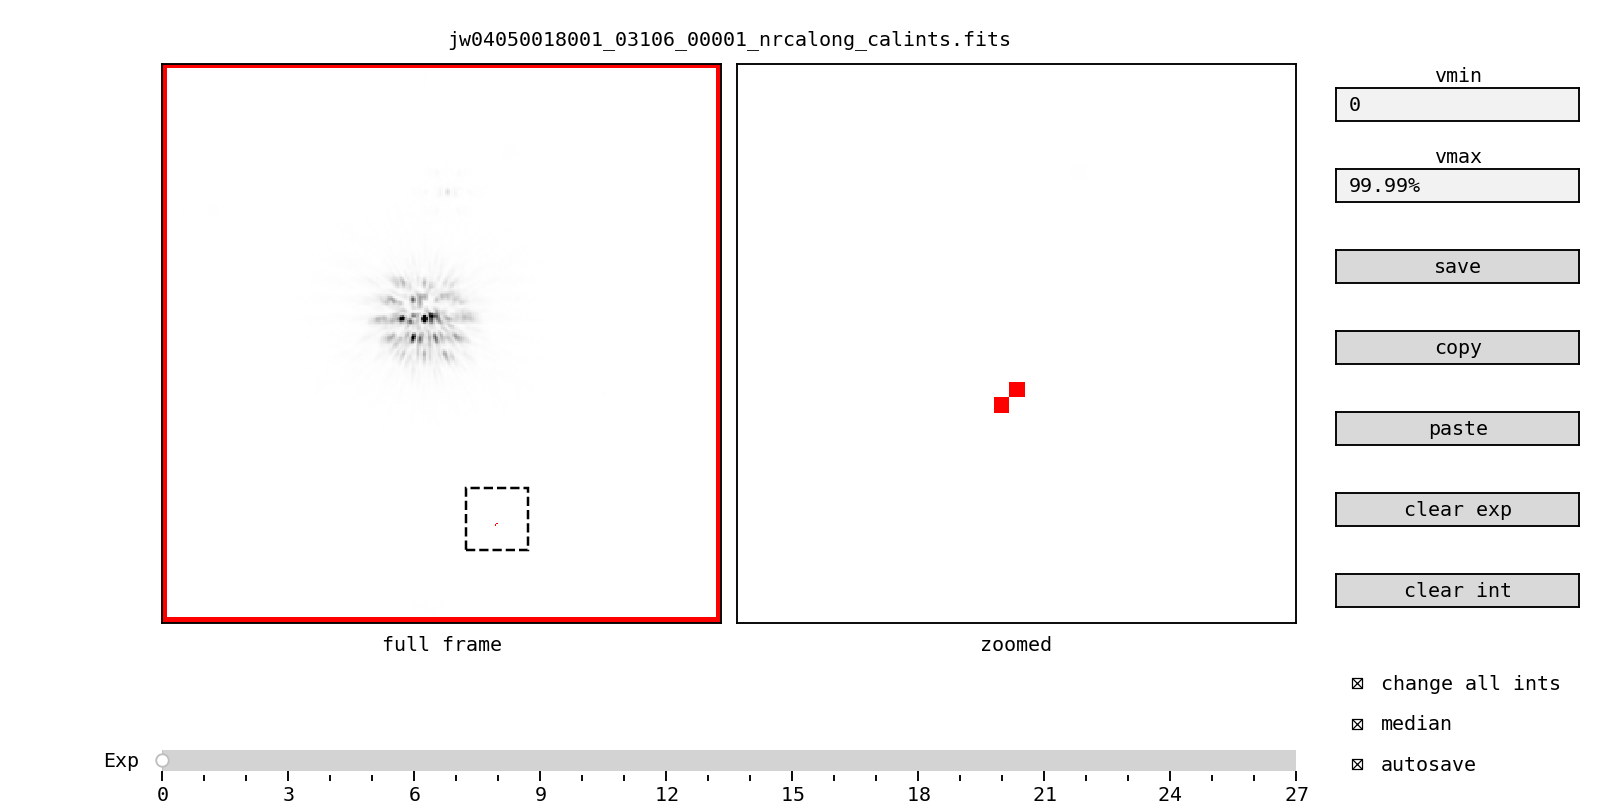

In [3]:
from ibadpx import fiwdil

fiwdil(Database, concats[1], badpx_subdir='badpx_maps')